In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import copy
import seaborn as sns

In [ ]:
data = pd.read_csv('/Users/taejin/Desktop/데분 학회/급행버스/route_kmeans.csv')
df = copy.deepcopy(data)

data = data.drop('노선명', axis=1)


In [ ]:
data

,중장거리비율,노선총거리(km),총승객수,굴곡도,cluster_labels
0,0.000000,8.372,3526.2128,1.638129,0
1,0.563826,84.000,10465.6352,1.748391,3
2,0.006799,12.000,6277.6760,2.074958,0
3,0.651178,47.000,11290.6930,2.658717,1
4,0.330555,57.000,18251.2942,1.988847,2
...,...,...,...,...,...
357,0.000000,11.000,89.0000,3.319377,1
358,0.000000,8.000,562.3539,1.094340,0
359,0.000000,56.000,24.1000,1.951338,1
360,0.081960,13.000,1054.6664,1.323578,0


### 1. 계층적 군집화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data

,중장거리비율,노선총거리(km),총승객수,굴곡도,cluster_labels
0,0.000000,0.061606,0.093693,0.127352,0.000000
1,0.641048,1.000000,0.279344,0.151184,1.000000
2,0.007731,0.106622,0.167303,0.221769,0.000000
3,0.740365,0.540903,0.301417,0.347945,0.333333
4,0.375829,0.664983,0.487635,0.203157,0.666667
...,...,...,...,...,...
357,0.000000,0.094214,0.001736,0.490741,0.333333
358,0.000000,0.056990,0.014400,0.009816,0.000000
359,0.000000,0.652575,0.000000,0.195050,0.333333
360,0.093185,0.119030,0.027571,0.059364,0.000000


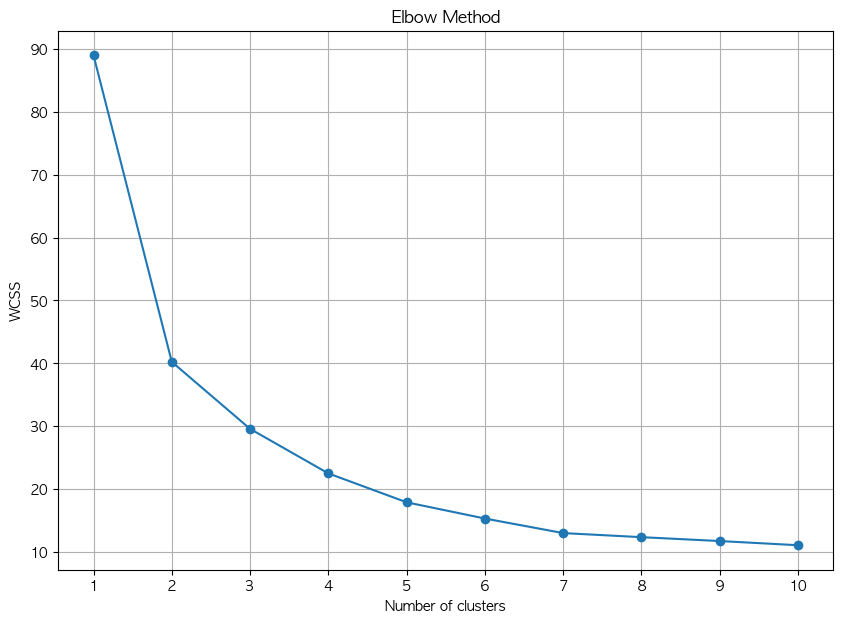

In [ ]:


# 클러스터 수를 1에서 10까지 변화시키며 WCSS 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=2000, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# 엘보우 그래프 생성
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


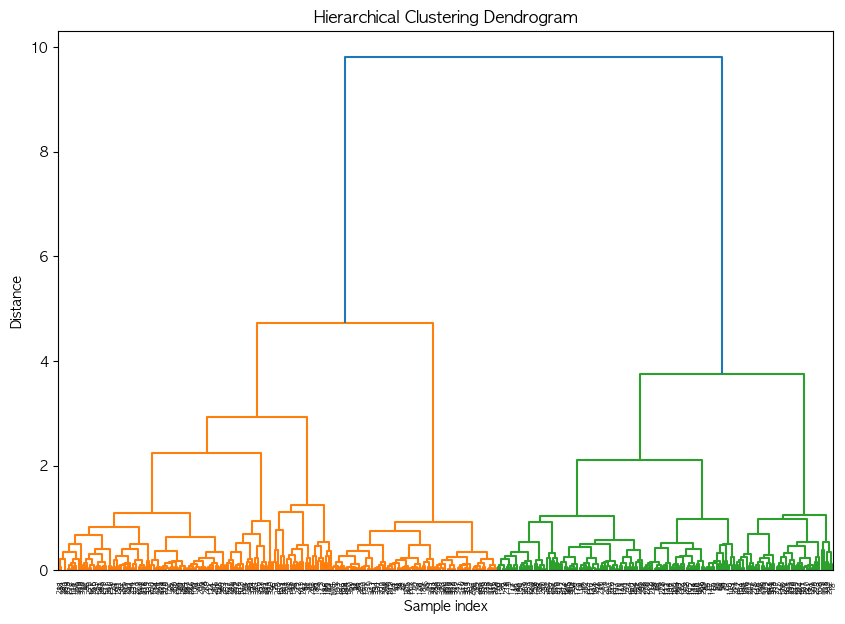

In [ ]:
# 계층적 군집화 수행
linked = linkage(data, 'ward', metric='euclidean')

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### 2. k-means clustering

In [ ]:
df.columns[1:-1]

Index(['중장거리비율', '노선총거리(km)', '총승객수', '굴곡도'], dtype='object')

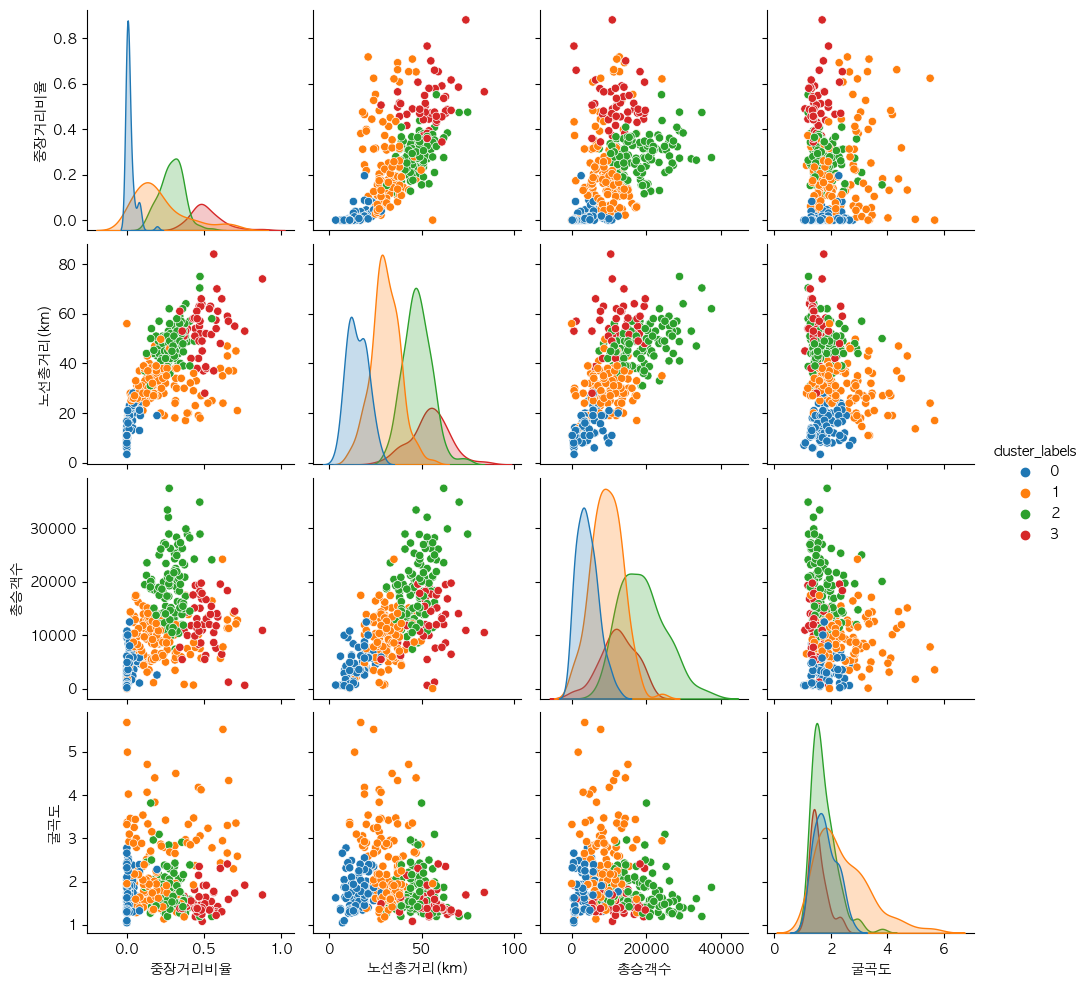

In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'
# plt.figure(figsize=(10, 7))

# K-Means 클러스터링 수행 (k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# pairplot 그리기
pairplot = sns.pairplot(df, hue='cluster_labels', palette='tab10')

# 중심점 추가
# for i, x_var in enumerate(df.columns[1:-1]):
#     for j, y_var in enumerate(df.columns[1:-1]):
#         if i != j:  # 대각선에는 중심점을 추가하지 않음
#             ax = pairplot.axes[j, i]
#             for cluster_idx, centroid in enumerate(centroids):
#                 ax.scatter(
#                     centroid[j],  # x좌표
#                     centroid[i],  # y좌표
#                     marker='X',
#                     s=100,
#                     c='black'
#                 )
plt.show()

In [ ]:
kmeans.cluster_centers_[:]

array([[ 5.84040467e-01,  6.30709108e-01,  3.27608676e-01,
         1.08876991e-01,  1.00000000e+00],
       [ 2.17913699e-02,  1.44904789e-01,  1.11706749e-01,
         1.61866545e-01, -3.88578059e-16],
       [ 2.39156613e-01,  3.33690691e-01,  2.46242348e-01,
         2.95871912e-01,  3.33333333e-01],
       [ 3.31495465e-01,  5.47736333e-01,  5.07240753e-01,
         1.52505662e-01,  6.63690476e-01]])

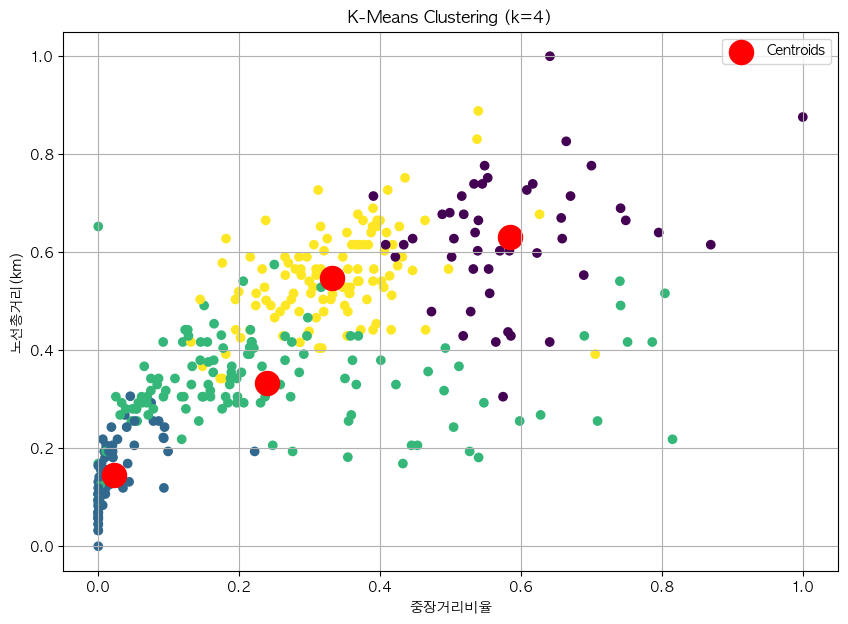

In [ ]:
# K-Means 클러스터링 수행 (k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=3000, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data)
# df['cluster_labels'] = clusters


# 클러스터링 결과 시각화
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('중장거리비율')
plt.ylabel('노선총거리(km)')
plt.legend()
plt.grid(True)
plt.show()

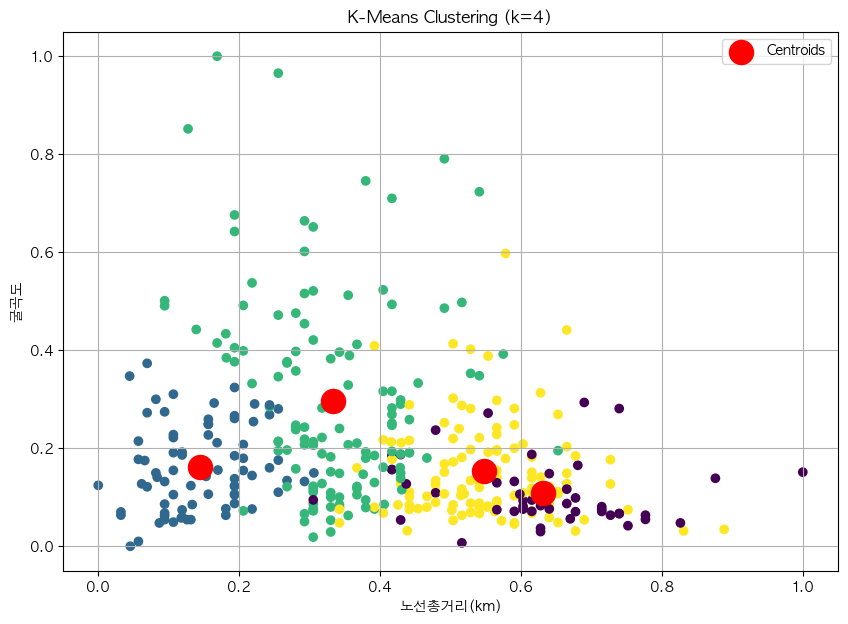

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:, 1], data.iloc[:,3], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('노선총거리(km)')
plt.ylabel('굴곡도')
plt.legend()
plt.grid(True)
plt.show()

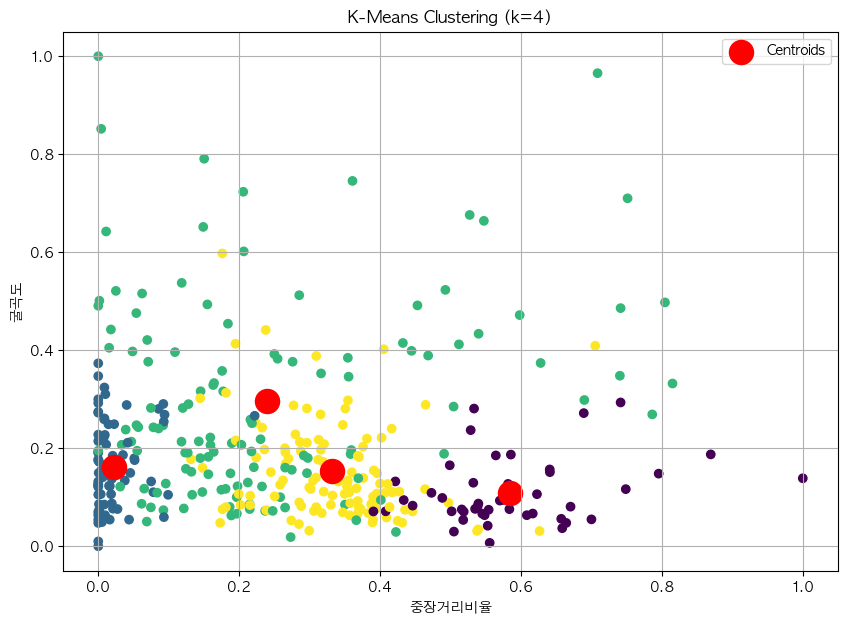

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:, 0], data.iloc[:, 3], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('중장거리비율')
plt.ylabel('굴곡도')
plt.legend()
plt.grid(True)
plt.show()

### 3. 클러스터 레이블링

In [ ]:
df.to_csv('/Users/taejin/Desktop/데분 학회/급행버스/route_kmeans.csv', index=False)

df['cluster_labels'] = clusters
df[df['cluster_labels'] == 2].head(50)

,노선명,중장거리비율,노선총거리(km),총승객수,굴곡도,cluster_labels
3,0411,0.651178,47.000,11290.6930,2.658717,2
8,102,0.164111,30.000,13740.2081,1.419475,2
10,103,0.227144,30.000,13379.6359,1.512167,2
11,104,0.172790,31.000,10591.1281,1.512159,2
15,109,0.208334,28.000,8354.9055,1.383027,2
19,1111,0.047757,26.000,13531.1708,2.191816,2
23,1119,0.716888,21.000,12779.1054,2.585275,2
24,1120,0.250904,32.000,4966.4457,3.419014,2
25,1122,0.463685,19.000,10072.9209,4.176782,2
27,1126,0.242640,19.000,11910.6439,2.790879,2
